In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
pip install --upgrade opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os, shutil

In [4]:
print(os.getcwd())

/Users/vinod/anaconda3


In [5]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6902 - acc: 0.5285 - val_loss: 0.6713 - val_acc: 0.6120
Epoch 2/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6577 - acc: 0.6210 - val_loss: 0.6458 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6290 - acc: 0.6485 - val_loss: 0.6325 - val_acc: 0.6260
Epoch 4/30
100/100 [==============================] - 19s 185ms/step - loss: 0.5967 - acc: 0.6905 - val_loss: 0.6083 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5549 - acc: 0.7165 - val_loss: 0.6103 - val_acc: 0.6550
Epoch 6/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5167 - acc: 0.7440 - val_loss: 0.5633 - val_acc: 0.7040
Epoch 7/30
100/100 [==============================] - 18s 178ms/step - loss: 0.4838 - acc: 0.7590 - val_loss: 0.5637 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 1

In [13]:
model.save('/Users/vinod/anaconda3/cats_and_dogs_small_1.h5')

/Users/vinod/anaconda3/envs/cs767/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


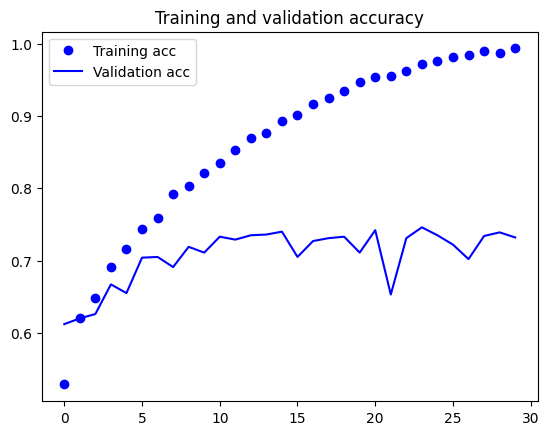

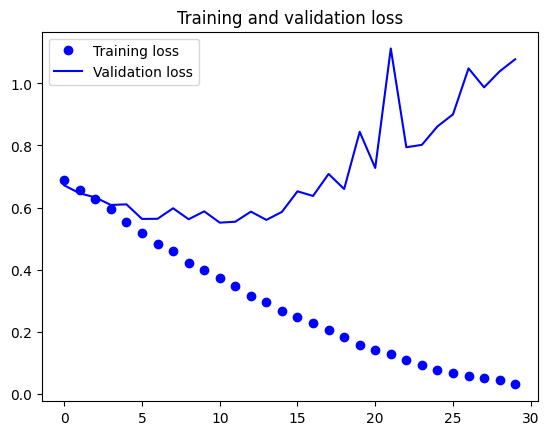

In [14]:
import matplotlib
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#####Added Checkpoint Point Code

In [15]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('/Users/vinod/anaconda3/cats_and_dogs_small_Callback.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
100/100 [==============================] - 18s 181ms/step - loss: 0.0384 - acc: 0.9870 - val_loss: 1.1041 - val_acc: 0.7380
Epoch 2/30


/Users/vinod/anaconda3/envs/cs767/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 18s 182ms/step - loss: 0.0247 - acc: 0.9945 - val_loss: 1.1924 - val_acc: 0.7340
Epoch 3/30
100/100 [==============================] - 19s 186ms/step - loss: 0.0256 - acc: 0.9930 - val_loss: 1.1310 - val_acc: 0.7300
Epoch 4/30
100/100 [==============================] - 18s 182ms/step - loss: 0.0176 - acc: 0.9960 - val_loss: 1.2866 - val_acc: 0.7310
Epoch 5/30
100/100 [==============================] - 18s 179ms/step - loss: 0.0279 - acc: 0.9925 - val_loss: 1.1838 - val_acc: 0.7470
Epoch 6/30
100/100 [==============================] - 18s 180ms/step - loss: 0.0142 - acc: 0.9955 - val_loss: 1.3010 - val_acc: 0.7310


In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


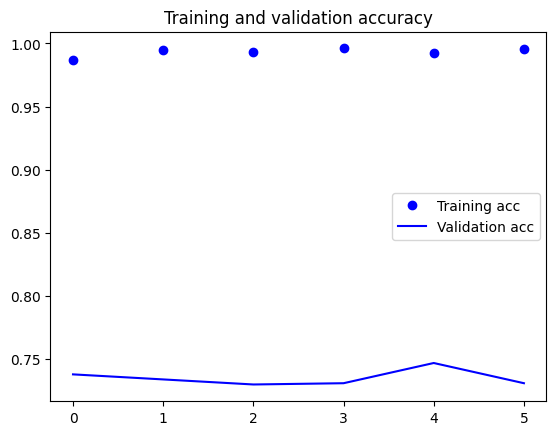

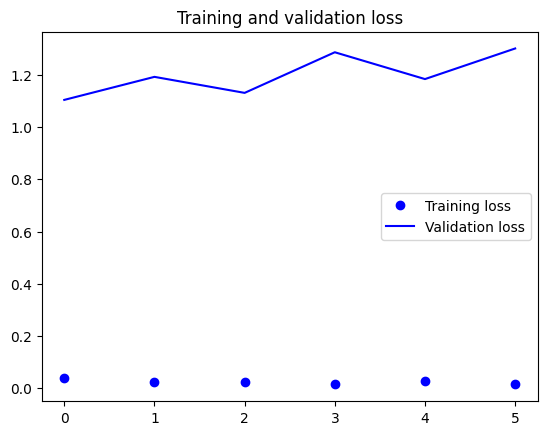

In [17]:
import matplotlib
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']



epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#####**  Problem 2  **#####

In [18]:
from tensorflow import keras
from keras.models import load_model

model = load_model('/Users/vinod/anaconda3/cats_and_dogs_small_Callback.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [19]:
# We preprocess the image into a 4D tensor
#from keras.preprocessing import image
#from tensorflow.keras import utils
#import numpy as np

#img_path = 'Lion.jpeg'
#img = utils.load_img(img_path, target_size=(150, 150))
##print(img.shape)
#print(type(img))
#img_tensor = utils.img_to_array(img)
#print(img_tensor.shape)
#img_tensor = np.expand_dims(img_tensor, axis=0)
#print('expand',img_tensor.shape)
## Remember that the model was trained on inputs
## that were preprocessed in the following way:
#img_tensor /= 255.

## Its shape is (1, 150, 150, 3)
#print(img_tensor.shape)
#print(type(img_tensor))

#import matplotlib.pyplot as plt

#plt.imshow(img_tensor[0])
#plt.show()

###Leveraging CV2 to import the image ####

In [20]:
import cv2
import numpy as np

168
<class 'numpy.ndarray'>
(168, 300, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


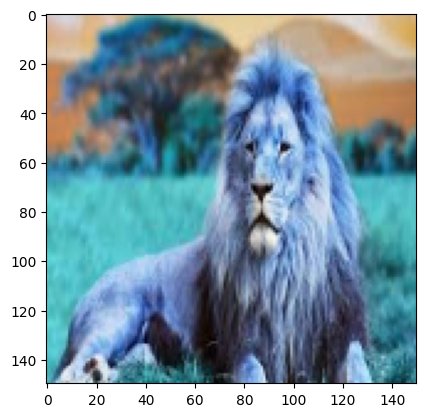

In [21]:
img_name = 'Lion.jpeg'
#img= np.array(cv2.imread(img_name, cv2.IMREAD_GRAYSCALE))
img= np.array(cv2.imread(img_name, cv2.IMREAD_COLOR))
cv_img_np = np.array(img)

print(len(img))
print(type(img))
print(img.shape)

print(type(cv_img_np))
#print(cv_img_np)

img_size = 150
img_tensor = cv2.resize(cv_img_np,(img_size,img_size))
#print(type(img_tensor))
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [22]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 48ms/step
(1, 148, 148, 32)


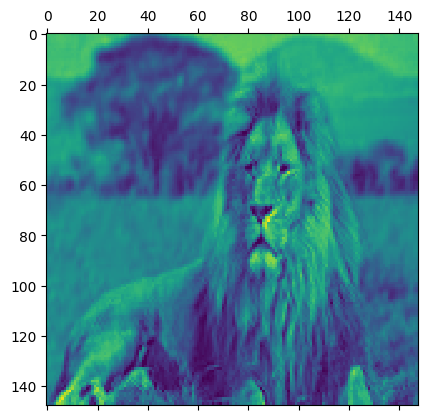

In [23]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

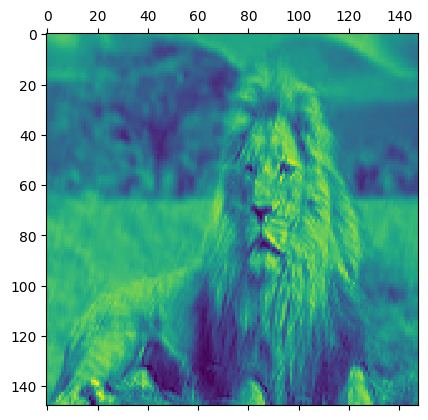

In [24]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

In [25]:
third_layer_activation = activations[2]
print(third_layer_activation.shape)

(1, 72, 72, 64)


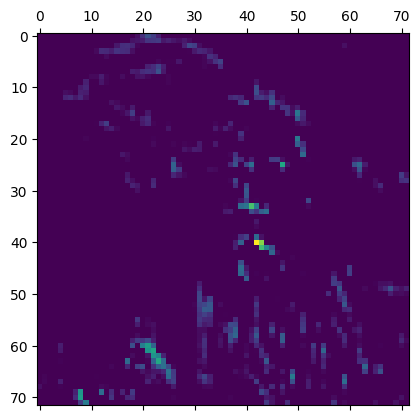

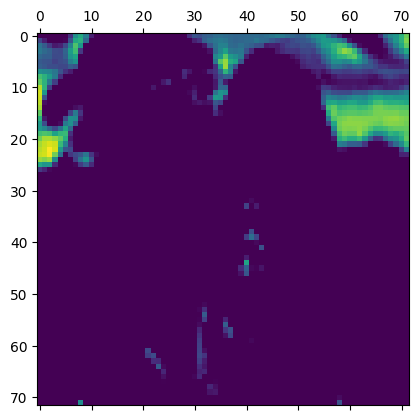

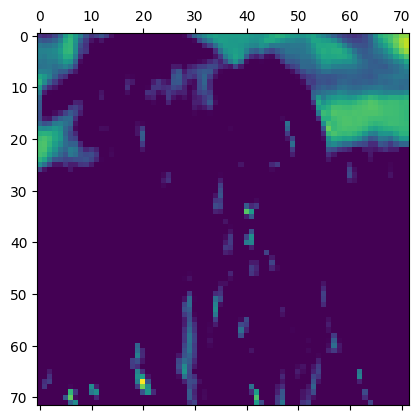

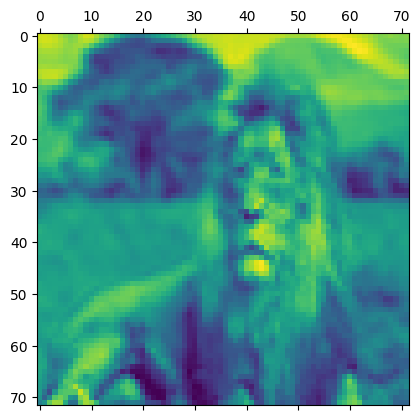

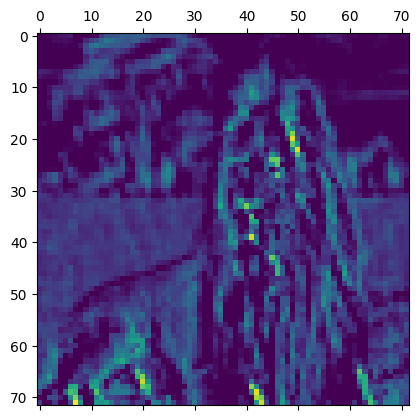

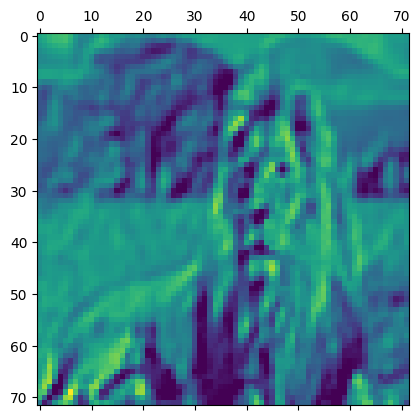

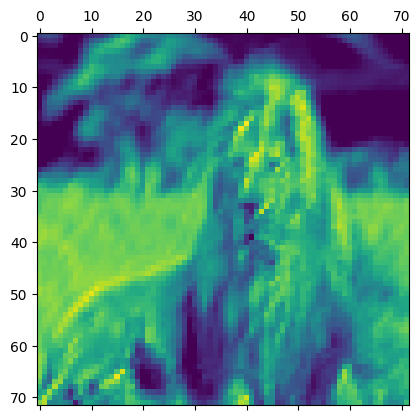

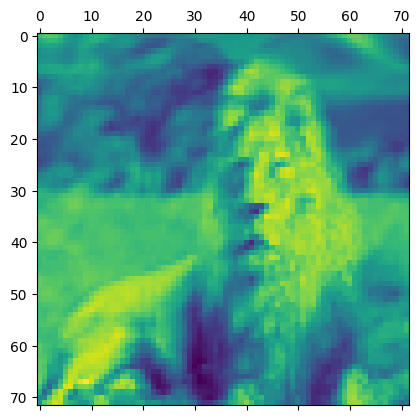

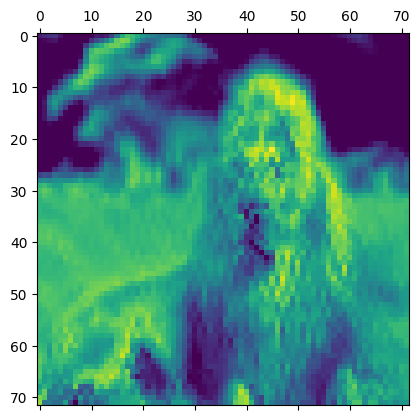

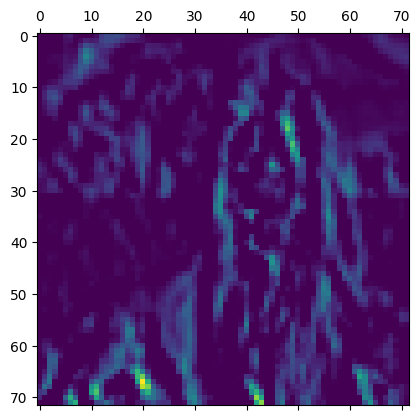

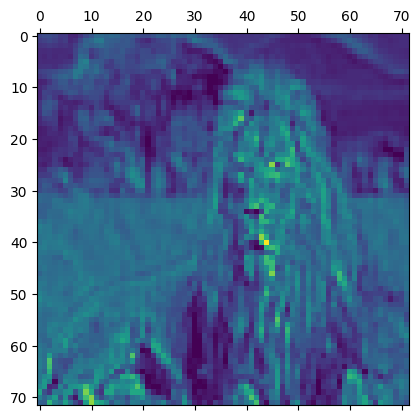

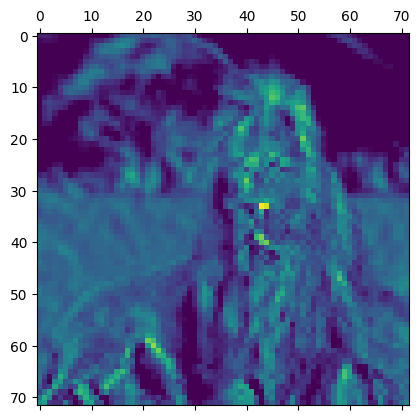

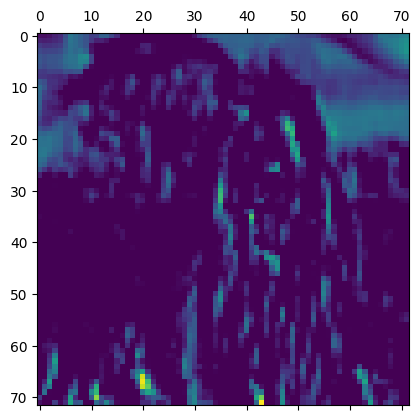

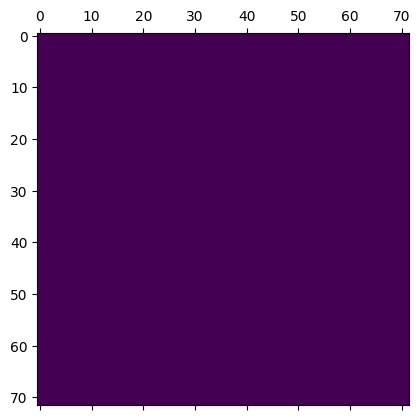

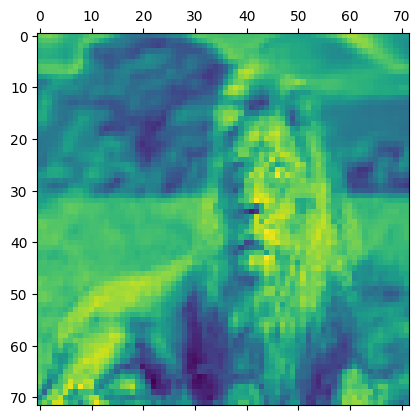

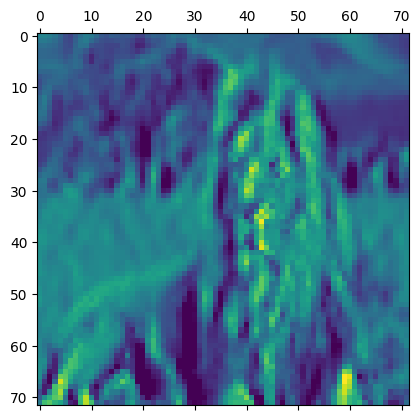

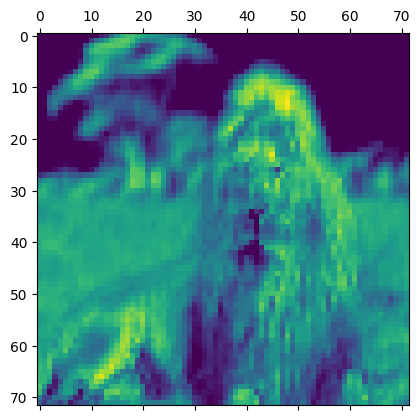

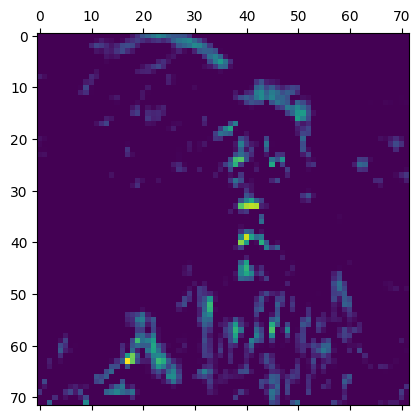

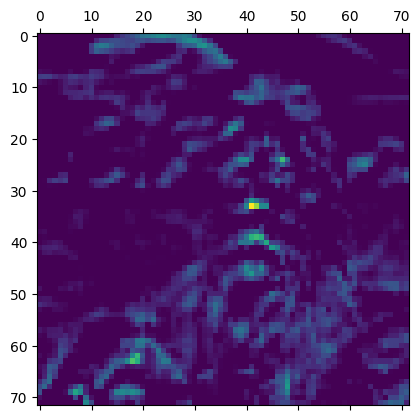

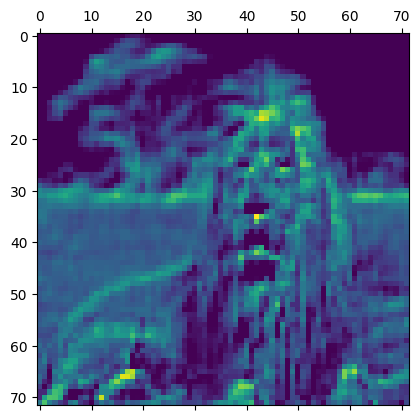

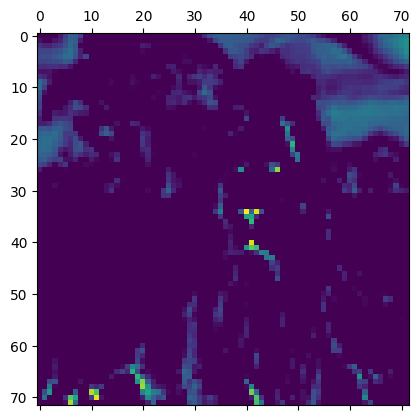

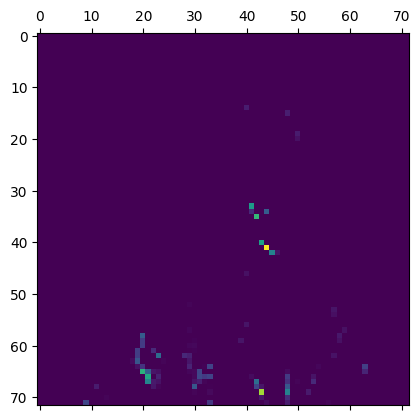

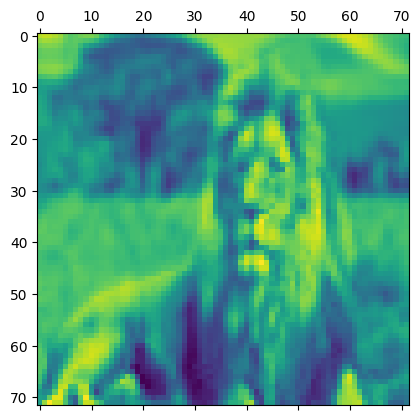

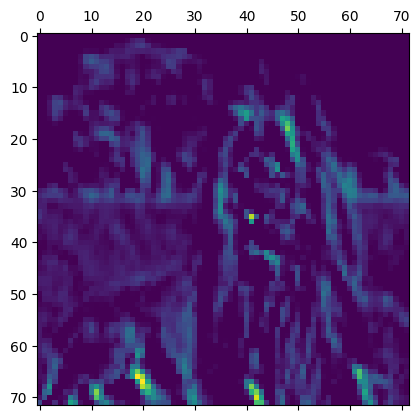

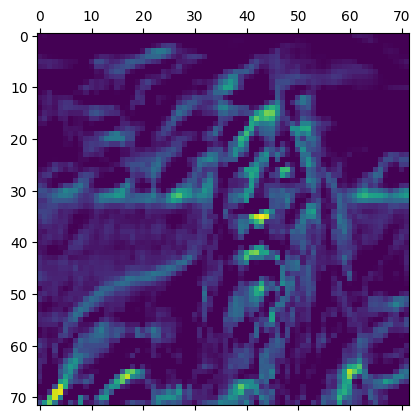

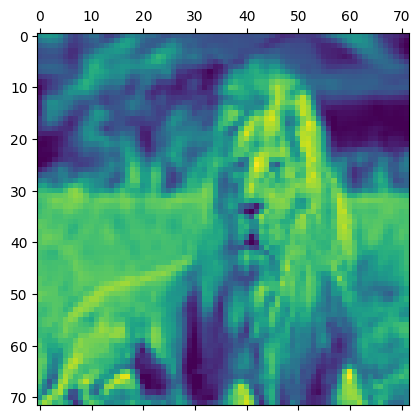

In [26]:
import matplotlib.pyplot as plt

for channels in range(2,28):
    plt.matshow(third_layer_activation[0, :, :, channels], cmap='viridis')
    plt.show()

In [27]:
####Intermediate Activations for Fourth Conv Layer

In [28]:
fourth_layer_activation = activations[3]
print(fourth_layer_activation.shape)

(1, 36, 36, 64)


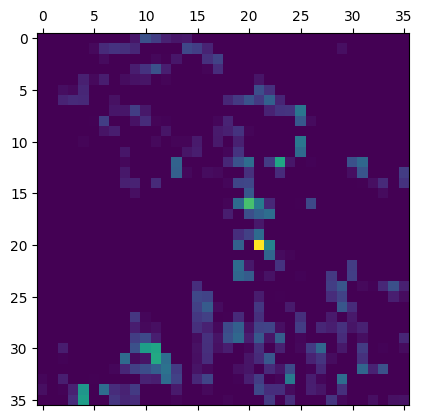

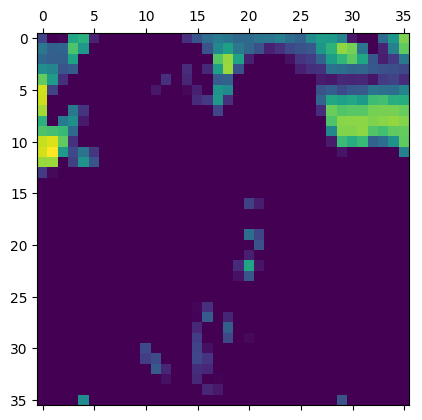

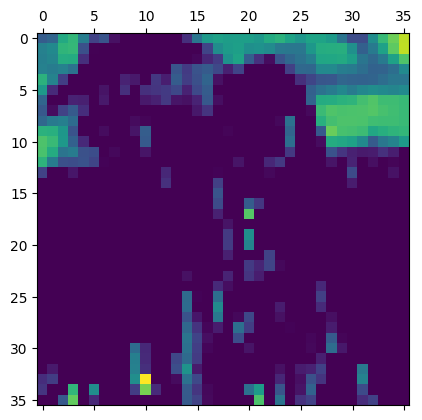

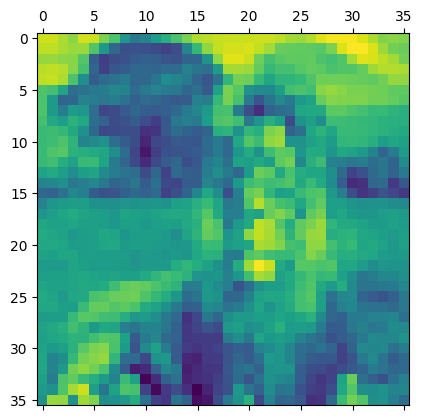

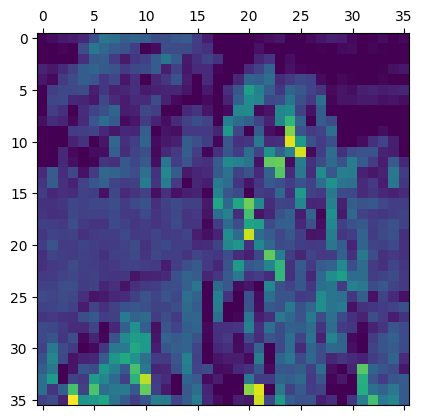

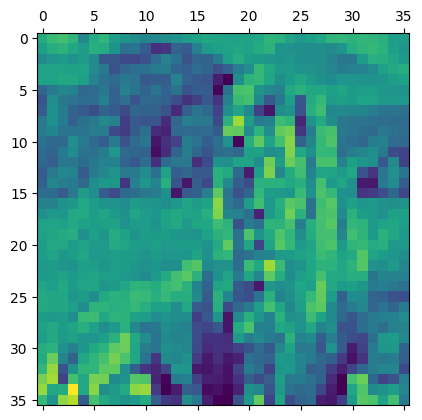

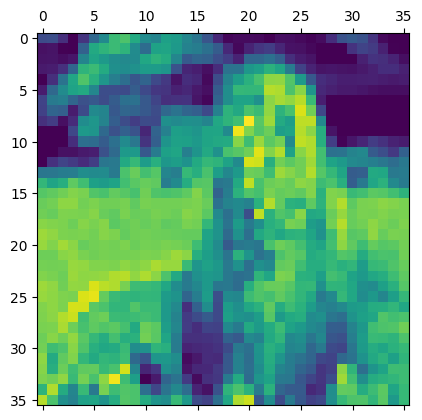

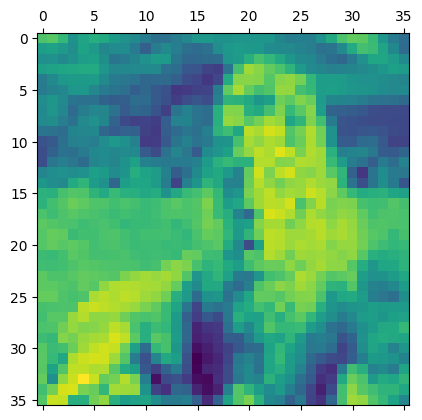

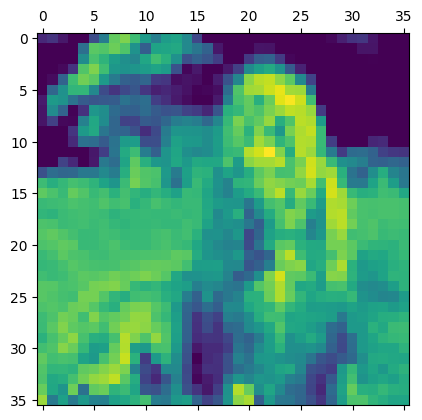

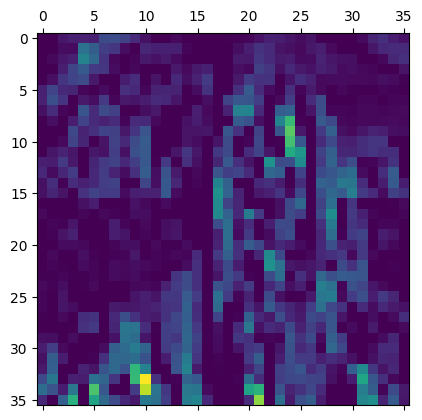

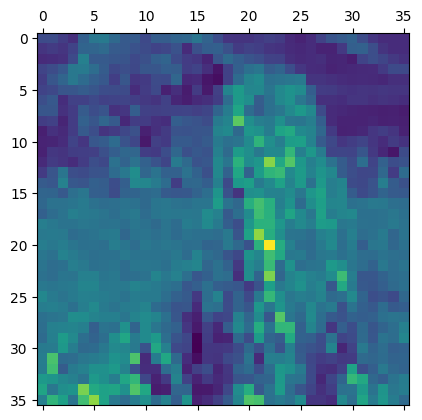

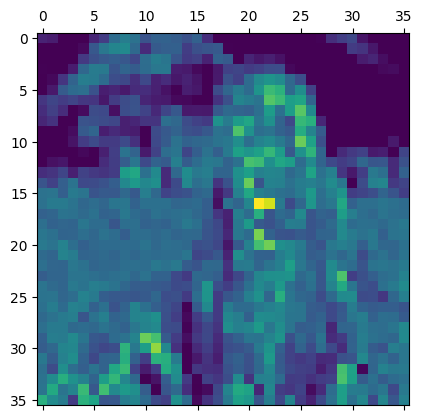

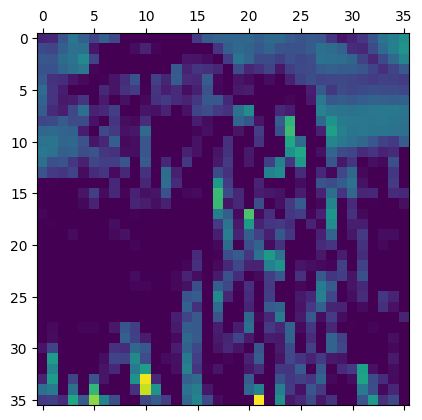

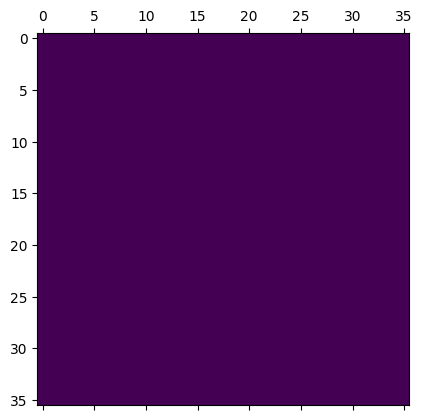

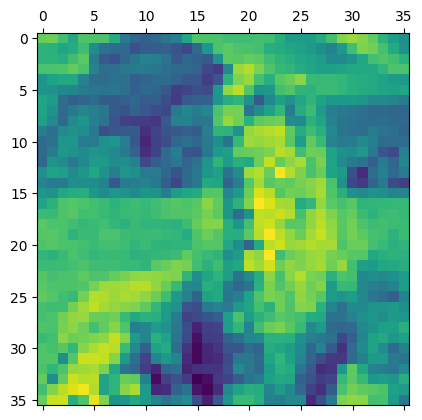

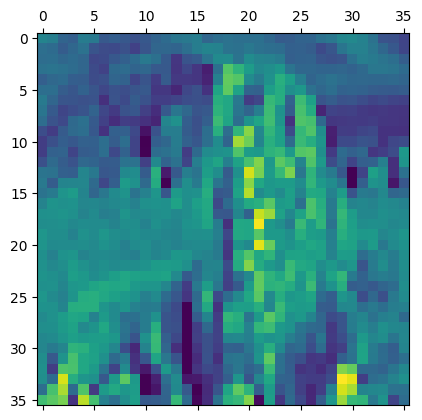

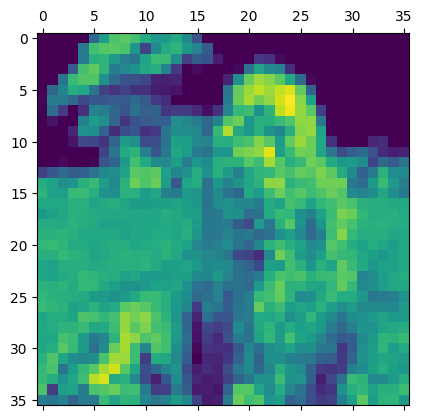

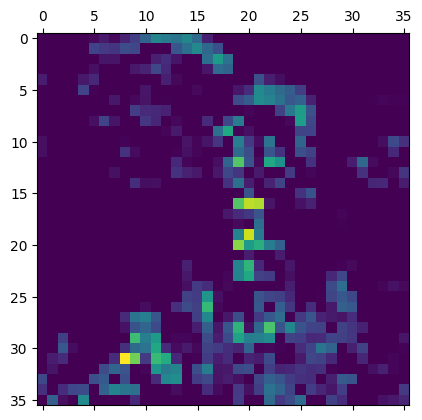

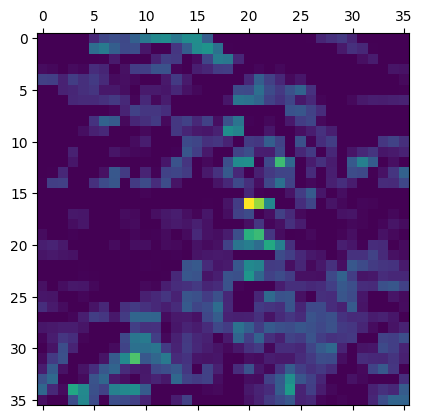

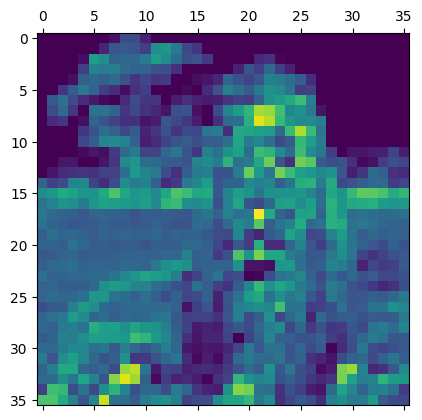

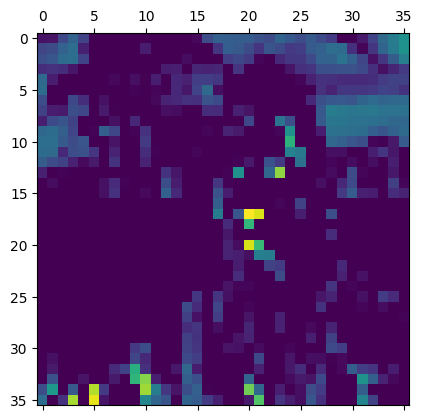

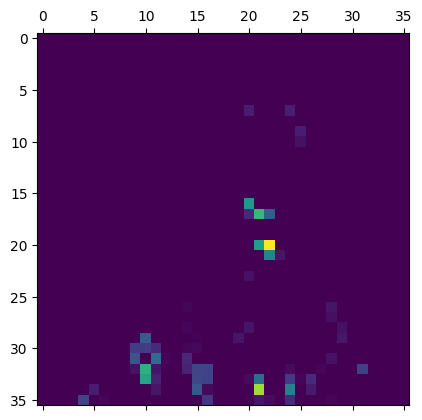

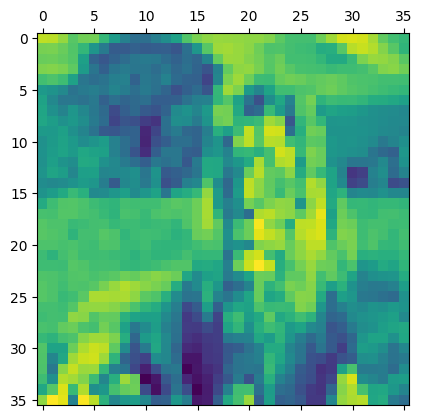

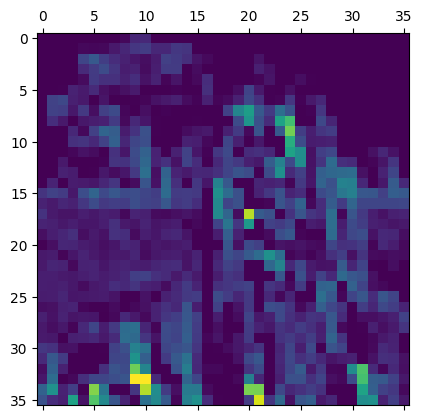

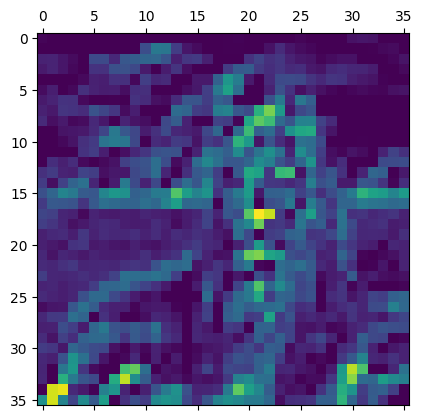

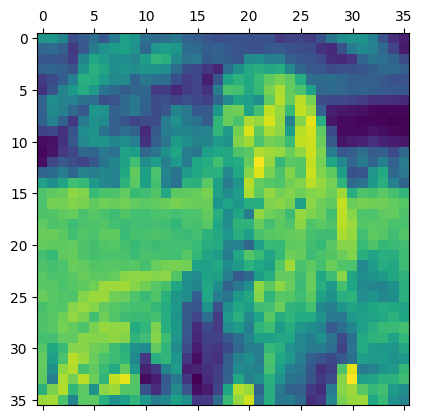

In [29]:
import matplotlib.pyplot as plt

for channels in range(2,28):
    plt.matshow(fourth_layer_activation[0, :, :, channels], cmap='viridis')
    plt.show()

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [31]:
model = keras.applications.VGG16(
    weights="imagenet",
    include_top=False)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [32]:
from tensorflow import keras
from keras.models import load_model

model = load_model('/Users/vinod/anaconda3/cats_and_dogs_small_Callback.h5')
model.summary()  # As a reminder.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [33]:
for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

conv2d
conv2d_1
conv2d_2
conv2d_3


In [34]:
#layer_name = "block5_conv2"
layer_name = "conv2d"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [35]:
import tensorflow as tf

#The loss function takes an image tensor and the index of the filter we are considering (an integer).
def compute_loss(image, filter_index):
    activation = feature_extractor(image)
    # Note that we avoid border artifacts by only involving non-border pixels
    # in the loss; we discard the first two pixels along the sides of the activation    
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    # Return the mean of the activation values for the filter.
    return tf.reduce_mean(filter_activation)

In [36]:
@tf.function
def gradient_ascent_step(image, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        # we have to wathc image tensor. It is not a TF variable
        tape.watch(image)
        # Compute the loss scalar, indicating how much the current image activates the filter.
        loss = compute_loss(image, filter_index)
    # Compute the gradients of the loss with respect to the image.
    grads = tape.gradient(loss, image)
    # Normilize the gradient by deviding it with its l2 norm
    grads = tf.math.l2_normalize(grads)
    # Move the image a little bit in a direction that activates our target filter more strongly
    image += learning_rate * grads
    # Return the updated image so we can run the step function in a loop.
    return image

In [37]:
img_width = 150
img_height = 150

def generate_filter_pattern(filter_index):
    # number of gradient ascent steps to apply
    iterations = 30
    # Aplitude of a single step
    learning_rate = 10.
    # Initialize an image tensor with random values 
    # the Xception model expects input values in the [0, 1] range, 
    # so here we pick a range centered on 0.5).
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, 3))
    # Repeatedly update the values of the image
    # tensor so as to maximize our loss function
    for i in range(iterations):
        image = gradient_ascent_step(image, filter_index, learning_rate)
    return image[0].numpy()

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
def deprocess_image(image):
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    # normilize values with in the range [0,255]
    image = np.clip(image, 0, 255).astype("uint8")
    # crop the image around the center to avoid border effects
    image = image[25:-25, 25:-25, :]
    return image

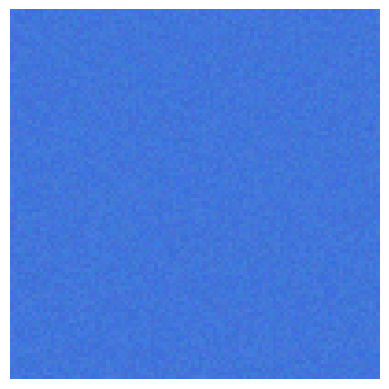

In [40]:
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=1)))

In [41]:
all_images = []
for filter_index in range(16): 
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

# Prepare a blank canvas for us to paste filter visualizations on.
margin = 5
n = 4
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with the saved filters.
for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

# save the canvas to disk
    keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


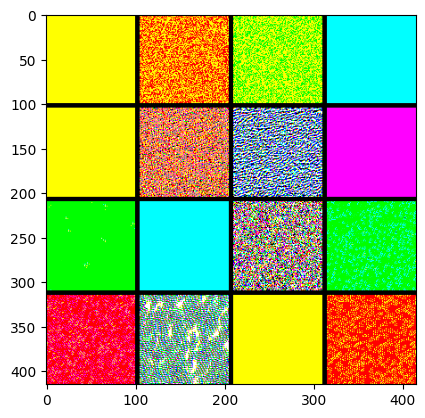

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
#img=image.load_img('filters_for_layer_conv2d_8.png')
img=image.load_img(f"filters_for_layer_{layer_name}.png")
# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)
plt.imshow(img_array[0])
plt.show()

In [43]:
#layer_name = "block4_conv3"
layer_name = "conv2d_1"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [44]:
all_images = []
for filter_index in range(64):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

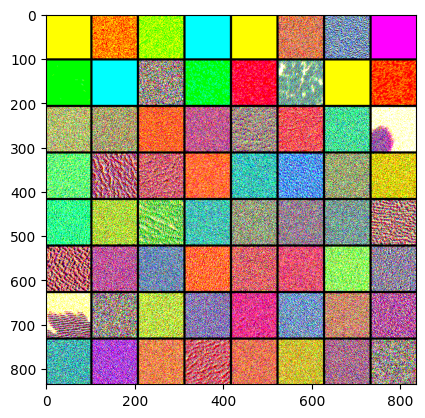

In [45]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
#img=image.load_img('filters_for_layer_conv2d_9.png')
img=image.load_img(f"filters_for_layer_{layer_name}.png")
# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)
plt.imshow(img_array[0])
plt.show()

In [46]:
#layer_name = "block4_conv3"
layer_name = "conv2d_2"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [47]:
all_images = []
for filter_index in range(128):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)



Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

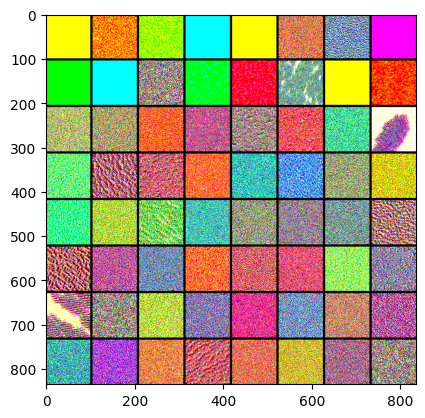

In [48]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
#img=image.load_img('filters_for_layer_conv2d_10.png')
img=image.load_img(f"filters_for_layer_{layer_name}.png")
# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)
plt.imshow(img_array[0])
plt.show()

In [49]:
#layer_name = "block4_conv3"
layer_name = "conv2d_3"
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)

In [50]:
all_images = []
for filter_index in range(128):
    print(f"Processing filter {filter_index}")
    image = deprocess_image(
        generate_filter_pattern(filter_index)
    )
    all_images.append(image)

#print(all_images)

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

for i in range(n):
    for j in range(n):
        image = all_images[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image

keras.utils.save_img(
    f"filters_for_layer_{layer_name}.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

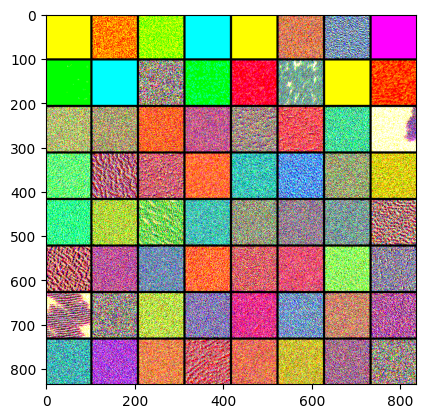

In [51]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
#img=image.load_img('filters_for_layer_conv2d_11.png')
img=image.load_img(f"filters_for_layer_{layer_name}.png")
# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)
plt.imshow(img_array[0])
plt.show()

In [52]:
import tensorflow as tf
from tensorflow import keras
model = keras.applications.VGG16(weights="imagenet")

In [53]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [54]:
# VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'single-muddy-elephant.jpeg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)

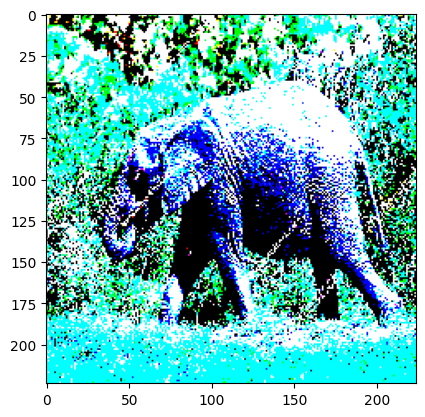

In [55]:
import matplotlib.pyplot as plt

plt.imshow(img_array[0])
plt.show()

In [56]:
preds = model.predict(img_array)
print('Predicted:', decode_predictions(preds, top=3)[0])

#print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 279ms/step
Predicted: [('n02504458', 'African_elephant', 0.4671434), ('n01871265', 'tusker', 0.36958313), ('n02504013', 'Indian_elephant', 0.16315289)]


In [57]:
np.argmax(preds[0])

386

In [58]:
# VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = 'creative_commons_elephant.jpeg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
img_array = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
img_array = preprocess_input(img_array)

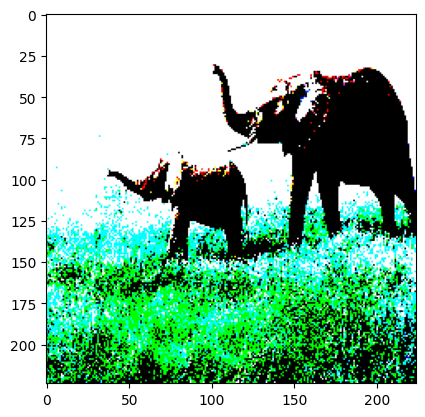

In [59]:
import matplotlib.pyplot as plt

plt.imshow(img_array[0])
plt.show()

In [60]:
preds = model.predict(img_array)
print('Predicted:', decode_predictions(preds, top=3)[0])

#print(keras.applications.xception.decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 176ms/step
Predicted: [('n02504458', 'African_elephant', 0.8873296), ('n01871265', 'tusker', 0.10903286), ('n02504013', 'Indian_elephant', 0.0035632828)]


In [61]:
np.argmax(preds[0])

386

In [62]:
# VGG16
# last_conv_layer_name = "block5_pool"
# 
last_conv_layer_name = "block5_conv3"
classifier_layer_names = [
    "block5_pool",
    "flatten",
    "fc1",
    "fc2",
    "predictions",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [63]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [64]:
import tensorflow as tf

with tf.GradientTape() as tape:
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]

grads = tape.gradient(top_class_channel, last_conv_layer_output)

In [65]:
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()
last_conv_layer_output = last_conv_layer_output.numpy()[0]
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
heatmap = np.mean(last_conv_layer_output, axis=-1)

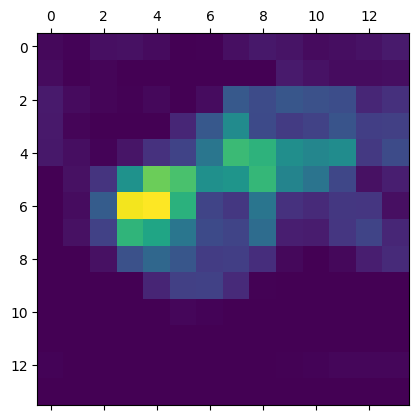

In [66]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [67]:
import matplotlib

img = keras.utils.load_img(img_path)
img = keras.utils.img_to_array(img)

heatmap = np.uint8(255 * heatmap)

jet = matplotlib.colormaps.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

jet_heatmap = keras.utils.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.utils.img_to_array(jet_heatmap)

superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.utils.array_to_img(superimposed_img)

save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

In [68]:
print(save_path)

elephant_cam.jpg


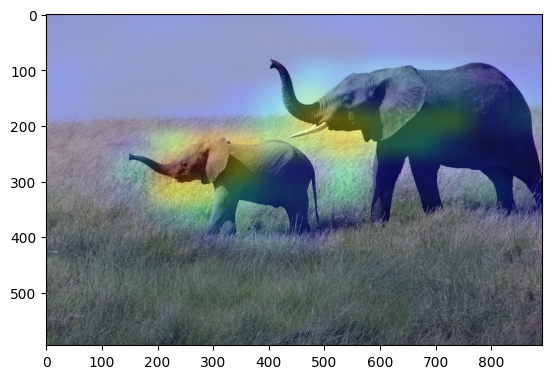

In [69]:
import matplotlib.pyplot as plt

plt.imshow(superimposed_img)
plt.show()